In [2]:
# filter cell used just to SHOW UNFISNIHED TRAINING JOBS
import pandas as pd

# Load the CSV file
file_path = "results.csv"
df = pd.read_csv(file_path)

df = df[(df['max_evals'] >= 100) & (df['pop_size'].isna())]
# Filter rows where either 'reference_fitness_train' or 'best_patch_fitness_train' is None or 0
filtered_df = df[
    (df['reference_fitness_train'].isnull()) | (df['reference_fitness_train'] == 0) |
    (df['best_patch_fitness_train'].isnull()) | (df['best_patch_fitness_train'] == 0) |
    (df['reference_fitness_validate'].isnull()) | (df['reference_fitness_validate'] == 0) |
    (df['patch_fitness_validate'].isnull()) | (df['patch_fitness_validate'] == 0)
    ]

# Select the specified columns to display
columns_to_display = [
    'software', 'algorithm', 'pop_size', 'max_evals', 'fold',
    'reference_fitness_train', 'best_patch_fitness_train',
    'reference_fitness_validate', 'patch_fitness_validate',
    'train_log', 'validate_log'

]
filtered_table = filtered_df[columns_to_display]

# Display the filtered table
pd.set_option('display.max_rows', None)
#las columnas sin limite de anchura
pd.set_option('display.max_colwidth', None)
display(filtered_table)


,software,algorithm,pop_size,max_evals,fold,reference_fitness_train,best_patch_fitness_train,reference_fitness_validate,patch_fitness_validate,train_log,validate_log
72,weka,FirstImprovement,NaN,100,1,38.87,No better variant found,NaN,0.0,/home/pbermejo/GeneticImprovement/magpie/_magpie_logs/weka_1762429184_FOLD1.log,NaN


In [3]:
import pandas as pd

# Load the CSV file
df = pd.read_csv(file_path)

#LocalSearch First ImProvement no tiene pop size
df['pop_size'] = pd.to_numeric(df['pop_size'], errors='coerce').fillna(-1).astype(int)

df = df[(df['max_evals'] >= 100)] #50 does not make sense for pop size 50 (just random init population)
#df = df[(df['algorithm'] != 'FirstImprovement')]
#df = df[df['pop_size'] == -1]  # -1 for local search
# Calculate the average of 'change_perc_train' and 'change_perc_validate' for each group
group= df.groupby(['software', 'algorithm', 'pop_size', 'max_evals', 'fitness'])[
    ['change_perc_train', 'change_perc_validate','fold','patch_length','search_time_minutes']]



print("RESULTADOS POR CONFIGURACIÓN ÚNICA, POR FOLD")

# Print values in group
for name, data in group:
    print(f"Group Name: {name}")
    print(data)
    print('-' * 50)


grouped_mean = group.mean() ## mean across folds
grouped_mean = grouped_mean.drop(columns=['fold'])




# Convert the result to a DataFrame
averaged_results = grouped_mean.reset_index()

# Display the result, without row limit
pd.set_option('display.max_rows', None)
display(averaged_results)


RESULTADOS POR CONFIGURACIÓN ÚNICA, POR FOLD
Group Name: ('minisat_hack', 'FirstImprovement', np.int64(-1), np.int64(100), 'time')
    change_perc_train  change_perc_validate  fold  patch_length  \
7             -49.665               -34.397     5             2   
8             -65.875               -48.628     3             2   
11            -80.564               -18.372     1             3   
13            -83.361               -69.771     4             2   
14            -65.337               -41.780     2             1   

    search_time_minutes  
7              7.977783  
8              8.712750  
11             9.673200  
13            10.085683  
14            10.574467  
--------------------------------------------------
Group Name: ('minisat_hack', 'FirstImprovement', np.int64(-1), np.int64(250), 'time')
    change_perc_train  change_perc_validate  fold  patch_length  \
20            -92.042                -2.184     5             3   
26            -93.670               -29

,software,algorithm,pop_size,max_evals,fitness,change_perc_train,change_perc_validate,patch_length,search_time_minutes
0,minisat_hack,FirstImprovement,-1,100,time,-68.9604,-42.5896,2.0,9.404777
1,minisat_hack,FirstImprovement,-1,250,time,-89.3670,-10.4894,3.4,22.249973
2,minisat_hack,FirstImprovement,-1,500,time,-79.9678,-23.4244,4.4,48.337287
3,minisat_hack,FirstImprovement,-1,750,time,-86.3534,-30.5456,3.6,67.217380
4,minisat_hack,FirstImprovement,-1,1000,time,-87.1114,24.2510,8.6,79.182427
5,minisat_hack,GeneticProgrammingUniformConcat,50,100,time,-49.7124,-6.3806,1.0,6.717050
6,minisat_hack,GeneticProgrammingUniformConcat,50,250,time,-66.5520,-36.3144,1.2,15.954903
7,minisat_hack,GeneticProgrammingUniformConcat,50,500,time,-85.3244,7.6974,2.0,34.450617
8,minisat_hack,GeneticProgrammingUniformConcat,50,750,time,-81.2626,-9.7350,3.0,63.629960
9,minisat_hack,GeneticProgrammingUniformConcat,50,1000,time,-91.8476,24.9096,5.4,79.419293


### 2. Análisis de Convergencia de los algoritmos de búsqueda
#### 2.1. pop_size = 50, max_evals = {50, 100, 150, 200, 250, 500, 750, 1000}

Plotting graph for software: minisat_hack


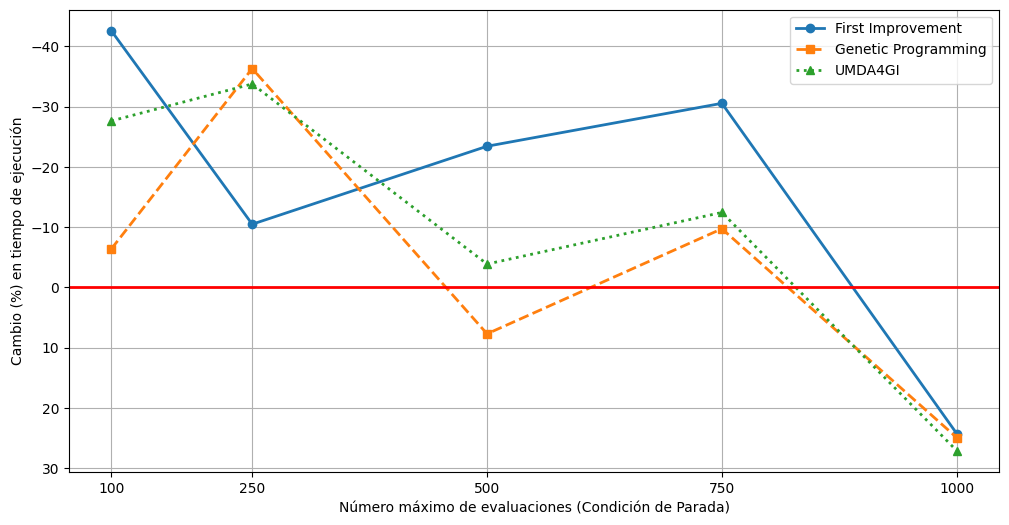

Plotting graph for software: pngOptim


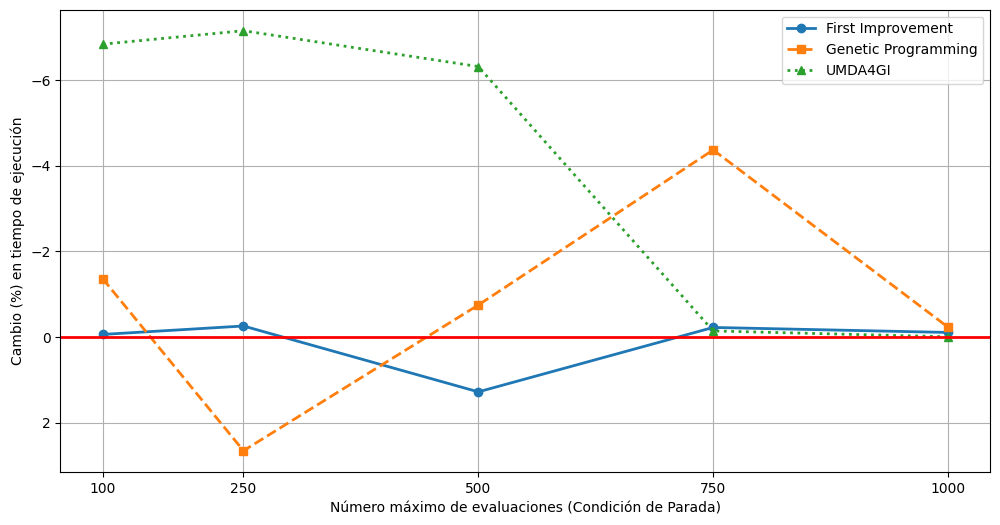

Plotting graph for software: sat4j


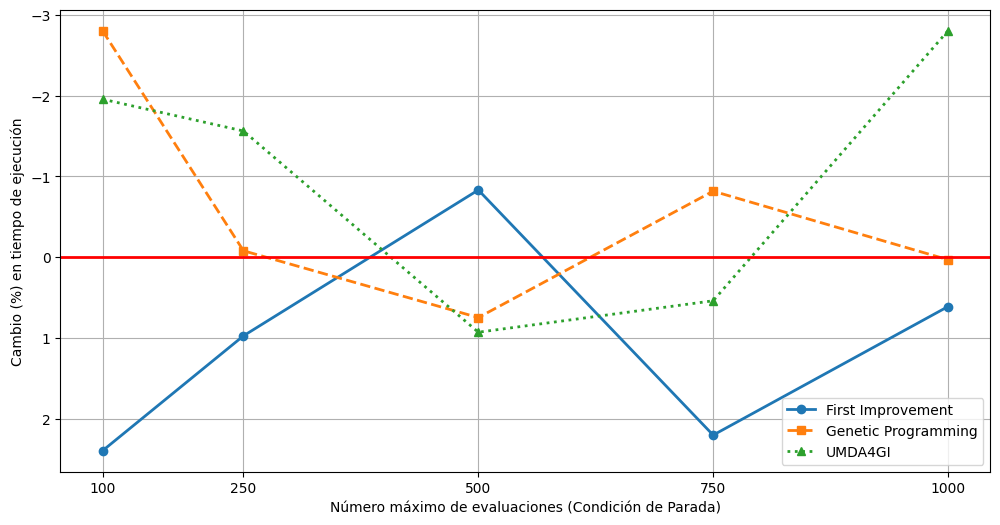

Plotting graph for software: weka


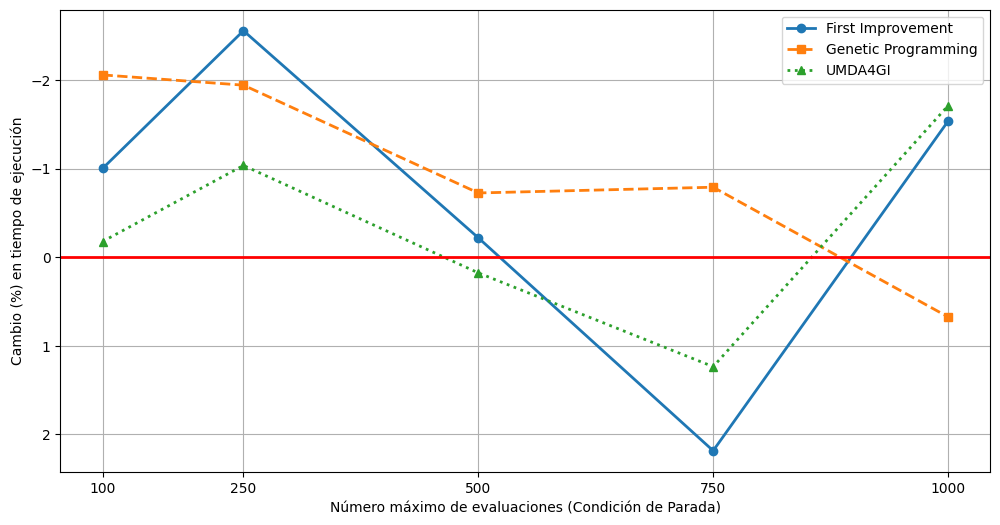

'Best max_evals by algorithm and software:'

software,minisat_hack,pngOptim,sat4j,weka
algorithm,,,,
FirstImprovement,100,250,500,250
GeneticProgrammingUniformConcat,250,750,100,100
UMDAAlgorithm,250,250,1000,1000


Table copied in clipboard.


In [4]:
# por cada software, gráfico de líneas de change_perce_validate vs max_evals para cada algoritmo.
# Tarea: dibujar cada algoritmo con una textura diferente (marker/estilo de línea) para distinguirlos visualmente.
# averaged_results viene filtrado de la celda anterior
import matplotlib.pyplot as plt

# For each software plot the graph
softwares = averaged_results['software'].unique()

line_styles = ['-', '--', ':', '-.']
markers = ['o', 's', '^', 'D', 'v', 'P', 'X', '*', '<', '>']

legend_name_map = {
    'FirstImprovement': 'First Improvement',
    'GeneticProgrammingUniformConcat': 'Genetic Programming',
    'UMDAAlgorithm': 'UMDA4GI'
}


for software in softwares:
    print(f"Plotting graph for software: {software}")
    software_data = averaged_results[averaged_results['software'] == software]
    algorithms = list(software_data['algorithm'].unique())

    plt.figure(figsize=(12, 6))
    for i, algorithm in enumerate(algorithms):
        algorithm_data = software_data[software_data['algorithm'] == algorithm].sort_values('max_evals')
        plt.plot(
            algorithm_data['max_evals'],
            algorithm_data['change_perc_validate'],
            label=legend_name_map.get(algorithm, algorithm),
            linestyle=line_styles[i % len(line_styles)],
            marker=markers[i % len(markers)],
            linewidth=2,
            markersize=6
        )

    #plt.title(f'Change Percentage Validate vs Max Evals for Software: {software}')
    plt.xlabel('Número máximo de evaluaciones (Condición de Parada)')
    plt.ylabel('Cambio (%) en tiempo de ejecución')
    plt.gca().invert_yaxis()  # Invertir el eje Y
    plt.xticks(sorted(software_data['max_evals'].unique()))  # Set x-axis ticks to unique values of max_evals
    plt.legend()
    plt.grid(True)
    #add an horizontal red thick line at 0
    plt.axhline(y=0, color='r', linestyle='-', linewidth=2)

    plt.savefig(f"plots/{software}-ReductionTime.svg", format="svg", bbox_inches="tight")
    plt.show()

# create table: in rows the algorithms, in columns the software, and in each cell the max_evals that achieved the best change_perc_validate (lowest)
best_idx = averaged_results.groupby(['software', 'algorithm'])['change_perc_validate'].idxmin()
best = averaged_results.loc[best_idx, ['software', 'algorithm', 'max_evals', 'change_perc_validate']].copy()

best_pivot = best.pivot(index='algorithm', columns='software', values='max_evals').sort_index()

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
display("Best max_evals by algorithm and software:")
display(best_pivot)
best_pivot.to_clipboard(index=True)
print("Table copied in clipboard.")


In [5]:
# Change_perc_validate for each algorithm in the respective best max_evals for each software

# Select rows corresponding to the best max_evals per algorithm and software
best_validate_data = averaged_results.loc[
    averaged_results.set_index(['software', 'algorithm', 'max_evals']).index.isin(
        best.set_index(['software', 'algorithm', 'max_evals']).index
    )
]

# Display the relevant columns: change_perc_validate for each algorithm in the respective best max_evals
best_change_validate = best_validate_data[['software', 'algorithm', 'max_evals', 'change_perc_validate']]

# Display the results
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
display("Change_perc_validate for each algorithm in the best max_evals per software:")
display(best_change_validate)

# Optionally copy the results to clipboard
best_change_validate.to_clipboard(index=False)
print("Results copied to clipboard.")


'Change_perc_validate for each algorithm in the best max_evals per software:'

,software,algorithm,max_evals,change_perc_validate
0,minisat_hack,FirstImprovement,100,-42.5896
6,minisat_hack,GeneticProgrammingUniformConcat,250,-36.3144
11,minisat_hack,UMDAAlgorithm,250,-33.7560
16,pngOptim,FirstImprovement,250,-0.2560
23,pngOptim,GeneticProgrammingUniformConcat,750,-4.3686
26,pngOptim,UMDAAlgorithm,250,-7.1516
32,sat4j,FirstImprovement,500,-0.8312
35,sat4j,GeneticProgrammingUniformConcat,100,-2.8012
44,sat4j,UMDAAlgorithm,1000,-2.8018
46,weka,FirstImprovement,250,-2.5576


Results copied to clipboard.


# Ranking del mejor max_evals según columna change_perc_validate, para cada algoritmo a partir de todos los software.

In [6]:
# Compute the ranking of best max_evals based on column change_perc_validate for each algorithm across all software.

# Group data by algorithm and max_evals, aggregating change_perc_validate to calculate overall average across software
validate_avg = averaged_results.groupby(['algorithm', 'max_evals'], as_index=False)['change_perc_validate'].mean()
display(validate_avg)

# Sort data by algorithm and change_perc_validate to rank max_evals for each algorithm
validate_avg['rank'] = validate_avg.groupby('algorithm')['change_perc_validate'].rank(method='min')

# Pivot the table to display the ranking of max_evals by change_perc_validate for each algorithm
validate_ranking = validate_avg.pivot(index='max_evals', columns='algorithm', values='rank').sort_index()

# Display the ranking table
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
display('Ranking of Best max_evals by Change Percentage Validate (Lower Rank = Better):')
display(validate_ranking)
validate_ranking.to_clipboard(index=True)
print("Table copied in clipboard.")



,algorithm,max_evals,change_perc_validate
0,FirstImprovement,100,-10.31390
1,FirstImprovement,250,-3.08240
2,FirstImprovement,500,-5.79815
3,FirstImprovement,750,-6.59530
4,FirstImprovement,1000,5.80540
5,GeneticProgrammingUniformConcat,100,-3.15130
6,GeneticProgrammingUniformConcat,250,-8.91995
7,GeneticProgrammingUniformConcat,500,1.74325
8,GeneticProgrammingUniformConcat,750,-3.92765
9,GeneticProgrammingUniformConcat,1000,6.34640


'Ranking of Best max_evals by Change Percentage Validate (Lower Rank = Better):'

algorithm,FirstImprovement,GeneticProgrammingUniformConcat,UMDAAlgorithm
max_evals,,,
100,1.0,3.0,2.0
250,4.0,1.0,1.0
500,3.0,4.0,4.0
750,2.0,2.0,3.0
1000,5.0,5.0,5.0


Table copied in clipboard.


In [7]:
# Compute the ranking of best max_evals based on times (votes) the algorithm gets better change_perc_validate for each algorithm across all software.
# This is better than ranking by mean value because change_perc_validate is too high in minisat_hack

# Identify the best change_perc_validate (minimum) for each software and algorithm
best_per_software = averaged_results.loc[
    averaged_results.groupby(['software', 'algorithm'])['change_perc_validate'].idxmin()
]

# Count the number of "wins" (votes) for each max_evals across all software, grouped by algorithm
votes = best_per_software.groupby(['algorithm', 'max_evals']).size().reset_index(name='wins')

# Ensure all possible max_evals appear, even those with 0 wins
all_max_evals = averaged_results['max_evals'].unique()
all_algorithms = averaged_results['algorithm'].unique()
full_index = pd.MultiIndex.from_product(
    [all_algorithms, all_max_evals], names=['algorithm', 'max_evals']
)
votes = votes.set_index(['algorithm', 'max_evals']).reindex(full_index, fill_value=0).reset_index()

# Rank max_evals for each algorithm based on the total "wins" across software
votes['rank'] = votes.groupby('algorithm')['wins'].rank(method='min', ascending=False)

# Pivot the table to display the ranking of max_evals by "votes" for each algorithm
ranking_votes = votes.pivot(index='max_evals', columns='algorithm', values='rank').sort_index()

# Display the ranking table
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
display('Ranking of Best max_evals by Votes (Wins Counts) for Each Algorithm:')
display(ranking_votes)
ranking_votes.to_clipboard(index=True)
print("Table copied in clipboard.")


'Ranking of Best max_evals by Votes (Wins Counts) for Each Algorithm:'

algorithm,FirstImprovement,GeneticProgrammingUniformConcat,UMDAAlgorithm
max_evals,,,
100,2.0,1.0,3.0
250,1.0,2.0,1.0
500,2.0,4.0,3.0
750,4.0,2.0,3.0
1000,4.0,4.0,1.0


Table copied in clipboard.


Vemos la mejora en validación para cada algoritmo en su mejor max evals según el ranking anterior, en todos los software. UMDA gana 3 de 4 veces:

In [8]:
# Change_perc_validate in each software for: FirstImprovement with 750 max evals; GeneticProgramming with 500 max evals, and UMDA with 500 max evals

# Filter the data for the specific max_evals and algorithms requested
filtered_data = averaged_results[
    (
            (averaged_results['algorithm'] == 'FirstImprovement') &
            (averaged_results['max_evals'] == 250)
    ) | (
            (averaged_results['algorithm'] == 'GeneticProgrammingUniformConcat') &
            (averaged_results['max_evals'] == 250)
    ) | (
            (averaged_results['algorithm'] == 'UMDAAlgorithm') &
            (averaged_results['max_evals'] == 250)
    )
    ]

# Display the relevant columns for the requested data
change_validate_specific = filtered_data[['software', 'algorithm', 'max_evals', 'change_perc_validate']]

# Display the filtered results
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
display("Change_perc_validate for the specific algorithms and max_evals:")
display(change_validate_specific)

# Optionally copy the results to clipboard
change_validate_specific.to_clipboard(index=False)
print("Filtered results copied to clipboard.")


'Change_perc_validate for the specific algorithms and max_evals:'

,software,algorithm,max_evals,change_perc_validate
1,minisat_hack,FirstImprovement,250,-10.4894
6,minisat_hack,GeneticProgrammingUniformConcat,250,-36.3144
11,minisat_hack,UMDAAlgorithm,250,-33.7560
16,pngOptim,FirstImprovement,250,-0.2560
21,pngOptim,GeneticProgrammingUniformConcat,250,2.6566
26,pngOptim,UMDAAlgorithm,250,-7.1516
31,sat4j,FirstImprovement,250,0.9734
36,sat4j,GeneticProgrammingUniformConcat,250,-0.0792
41,sat4j,UMDAAlgorithm,250,-1.5608
46,weka,FirstImprovement,250,-2.5576


Filtered results copied to clipboard.


####  RANKING DE LOS ALGORITMOS PARA CADA BASE DE DATOS, SEGÚN change_perc_validate a través de los valores de max_evals

In [9]:
# RANKING DE LOS ALGORITMOS PARA CADA BASE DE DATOS, SEGÚN change_perc_validate a través de los valores de max_evals
validate_avg = averaged_results.groupby(['software', 'algorithm'], as_index=False)['change_perc_validate'].mean()

# Sort data by algorithm and change_perc_validate to rank max_evals for each algorithm
validate_avg['rank'] = validate_avg.groupby('software')['change_perc_validate'].rank(method='min')

# Pivot the table to display the ranking of max_evals by change_perc_validate for each algorithm
validate_ranking = validate_avg.pivot(index='algorithm', columns='software', values='rank').sort_index()

# Display the ranking table
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
display('Ranking de Algoritmos para cada sw, por change_percentage_validate para todos los valores de max_Evals')
display(validate_ranking)
validate_ranking.to_clipboard(index=True)
print("Table copied in clipboard.")


'Ranking de Algoritmos para cada sw, por change_percentage_validate para todos los valores de max_Evals'

software,minisat_hack,pngOptim,sat4j,weka
algorithm,,,,
FirstImprovement,1.0,3.0,3.0,2.0
GeneticProgrammingUniformConcat,3.0,2.0,2.0,1.0
UMDAAlgorithm,2.0,1.0,1.0,3.0


Table copied in clipboard.


### 3. Curvas de sobreajuste
En al sección anterior se ve que los mejore resultados son con 250 evaluaciones, y luego con 1000. En este apartado, vemos que con 1000 evaluaciones, en general se obtiene el menor sobreajuste (diferencia entre change_perc_train y change_perc_validate) para genético y busqueda local. Para UMDA, 250 y luego 1000. En rankings, 1000 gana siempre primer puesto para todos (ver al final de esta sección)

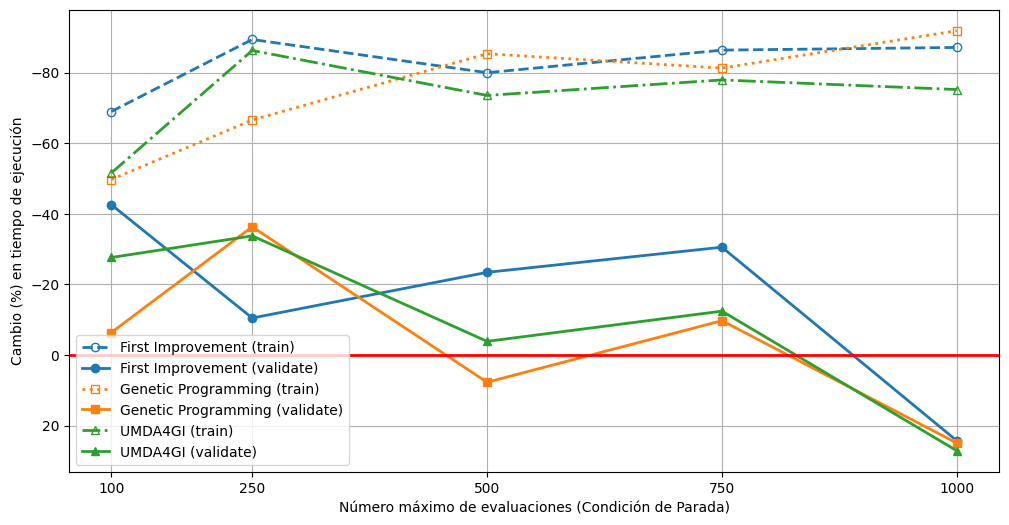

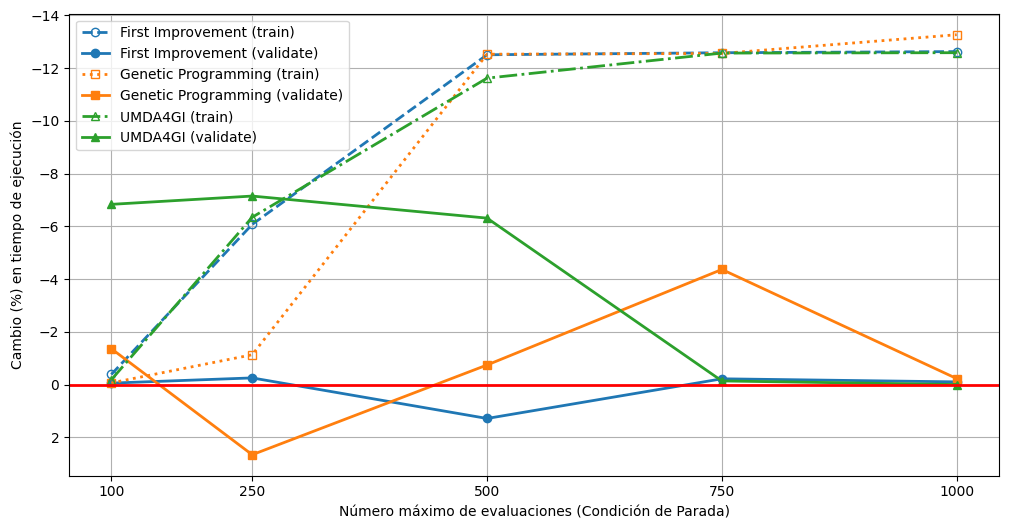

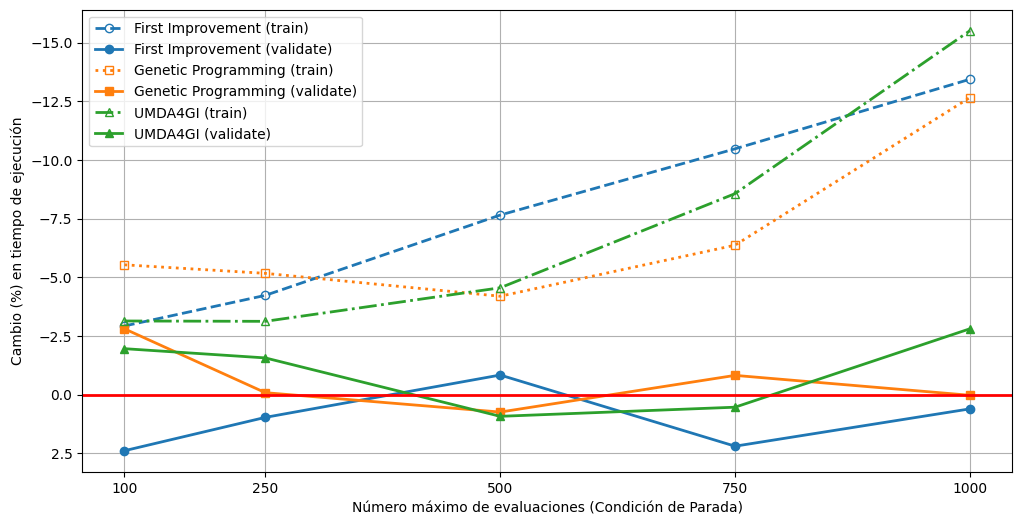

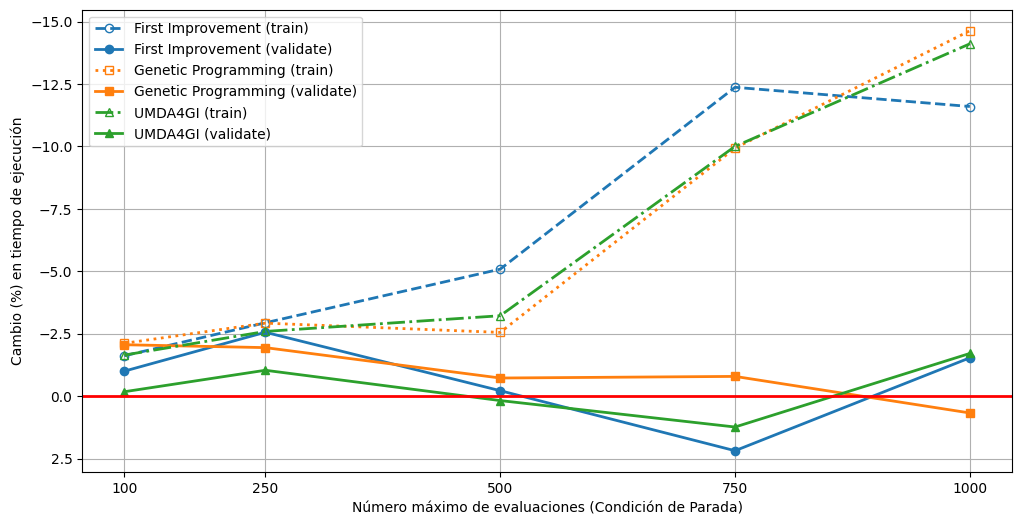

In [10]:
# Para cada software: 2 líneas por algoritmo (train/validate) con mismo color; validate siempre continua; texturas entre algoritmos muy distinguibles.
import matplotlib.pyplot as plt
valid_max = [100, 250, 500, 750, 1000]

averaged_results['max_evals'] = pd.to_numeric(averaged_results['max_evals'], errors='coerce').astype(int)
filtered = averaged_results[(averaged_results['max_evals'].isin(valid_max))]

legend_name_map = {
    'FirstImprovement': 'First Improvement',
    'GeneticProgrammingUniformConcat': 'Genetic Programming',
    'UMDAAlgorithm': 'UMDA4GI'
}

algorithms = filtered['algorithm'].unique()
color_map = {algorithm: plt.cm.tab10(i % 10) for i, algorithm in enumerate(algorithms)}

# Textura por algoritmo: validate continua siempre; train usa un estilo distinto (y fácil de distinguir entre algoritmos)
algo_train_linestyles = ['--', ':', '-.', (0, (1, 1))]
algo_markers = ['o', 's', '^', 'D', 'v', 'P', 'X', '*', '<', '>']
algo_style_map = {
    algorithm: {
        'train_linestyle': algo_train_linestyles[i % len(algo_train_linestyles)],
        'marker': algo_markers[i % len(algo_markers)]
    }
    for i, algorithm in enumerate(algorithms)
}

for software in filtered['software'].unique():
    software_data = filtered[filtered['software'] == software]
    plt.figure(figsize=(12, 6))

    for algorithm in software_data['algorithm'].unique():
        algorithm_data = software_data[software_data['algorithm'] == algorithm].sort_values('max_evals')
        legend_algorithm = legend_name_map.get(algorithm, algorithm)
        color = color_map[algorithm]
        style = algo_style_map[algorithm]

        # Train: misma familia visual, algo más tenue
        plt.plot(
            algorithm_data['max_evals'],
            algorithm_data['change_perc_train'],
            label=f'{legend_algorithm} (train)',
            linestyle=style['train_linestyle'],
            marker=style['marker'],
            color=color,
            linewidth=2,
            alpha=1.0,
            markersize=6,
            markerfacecolor='none'
        )

        # Validate: SIEMPRE continua
        plt.plot(
            algorithm_data['max_evals'],
            algorithm_data['change_perc_validate'],
            label=f'{legend_algorithm} (validate)',
            linestyle='-',
            marker=style['marker'],
            color=color,
            linewidth=2,
            alpha=1.0,
            markersize=6
        )

    #plt.title(f'Change Percentage Train and Validate vs Max Evals for {software}')
    plt.xlabel('Número máximo de evaluaciones (Condición de Parada)')
    plt.ylabel('Cambio (%) en tiempo de ejecución')
    plt.gca().invert_yaxis()
    plt.xticks(sorted(software_data['max_evals'].unique()))
    plt.axhline(y=0, color='r', linestyle='-', linewidth=2)
    plt.legend()
    plt.grid(True)
    plt.savefig(f"plots/{software}-overfitting.svg", format="svg", bbox_inches="tight")
    plt.show()


In [11]:
# compute the overfit (change_perc_validate- change_perc_validate) for each algorithm and software, for each max_evals.
import numpy as np

def compute_overfit(train, validate, higher_is_better=False, relative=False, eps=1e-12):
    """
    Calcula overfit:
      - higher_is_better=False: 'menor es mejor' (ej. tiempo). overfit = validate - train
      - higher_is_better=True: 'mayor es mejor' (ej. accuracy). overfit = train - validate
    Si relative=True devuelve porcentaje relativo respecto a |train|.
    Acepta escalares, listas, numpy arrays o pandas Series.
    """
    t = np.array(train)
    v = np.array(validate)
    diff = (t - v) if higher_is_better else (v - t)
    if relative:
        denom = np.maximum(np.abs(t), eps)
        return diff / denom * 100.0
    return diff

# overfit - porcentaje relativo de overfit respecto al train
averaged_results['overfit'] = compute_overfit(averaged_results['change_perc_train'], averaged_results['change_perc_validate'], False, relative=False)


# Asume que `averaged_results` ya existe en el notebook
# 1) Calcular overfit
#averaged_results['overfit'] = averaged_results['change_perc_validate'] - averaged_results['change_perc_train']

# 2) Asegurar que max_evals sea entero válido y eliminar filas inválidas
#averaged_results['max_evals'] = pd.to_numeric(averaged_results['max_evals'], errors='coerce').astype('Int64')
#averaged_results['max_evals'] = averaged_results['max_evals'].astype(int)

# 3) Si hay duplicados por (software, algorithm, max_evals) tomar la media del overfit (lo hara para los folds)
grp = averaged_results.groupby(['software', 'algorithm', 'max_evals'], as_index=False)['overfit'].mean()

# 4) Preparar columna con valor absoluto de overfit
#grp['abs_overfit'] = grp['overfit'].abs()

# 5) Obtener índices
idx_max = grp.groupby(['software', 'algorithm'])['overfit'].idxmax()   # más positivo (o menos negativo)

# 6) Seleccionar filas y pivotar para mostrar max_evals por algoritmo (filas) y software (columnas)
max_overfit = grp.loc[idx_max].pivot(index='algorithm', columns='software', values='max_evals').sort_index()

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

display("Max_evals con más overfit:")
display(max_overfit)


#tabla de sobreajuste absoluto de cada algoritmo para cada max_evals y software
for algorithm in np.unique(grp['algorithm']):
    data = grp[grp['algorithm'] == algorithm]
    pivot = data.pivot(index='max_evals', columns='software', values='overfit').sort_index()
    display(f"Overfit  de {algorithm}:")
    display(pivot)

'Max_evals con más overfit:'

software,minisat_hack,pngOptim,sat4j,weka
algorithm,,,,
FirstImprovement,1000,500,1000,750
GeneticProgrammingUniformConcat,1000,1000,1000,1000
UMDAAlgorithm,1000,1000,1000,1000


'Overfit  de FirstImprovement:'

software,minisat_hack,pngOptim,sat4j,weka
max_evals,,,,
100,26.3708,0.3288,5.3170,0.6144
250,78.8776,5.8210,5.2004,0.3796
500,56.5434,13.7910,6.8182,4.8656
750,55.8078,12.3638,12.6742,14.5510
1000,111.3624,12.5246,14.0480,10.0616


'Overfit  de GeneticProgrammingUniformConcat:'

software,minisat_hack,pngOptim,sat4j,weka
max_evals,,,,
100,43.3318,-1.2986,2.7278,0.0572
250,30.2376,3.7910,5.0860,0.9800
500,93.0218,11.7846,4.9372,1.8262
750,71.5276,8.1902,5.5490,9.1396
1000,116.7572,13.0400,12.6900,15.3044


'Overfit  de UMDAAlgorithm:'

software,minisat_hack,pngOptim,sat4j,weka
max_evals,,,,
100,23.9440,-6.6526,1.1800,1.4678
250,52.4980,-0.8034,1.5592,1.5546
500,69.6430,5.3082,5.4780,3.3964
750,65.4690,12.4322,9.1020,11.2366
1000,102.2826,12.5836,12.7046,12.3966


In [12]:
# Compute the ranking of best algorithm based on the  overfit for each dataset across all max_evals


overall_avg_overfit = grp.groupby(['software', 'algorithm'], as_index=False)['overfit'].mean()


overall_avg_overfit['rank'] = overall_avg_overfit.groupby('software')['overfit'].rank(method='min')


ranking_pivot = overall_avg_overfit.pivot(index='algorithm', columns='software', values='rank').sort_index()

# Display the ranking table
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
display('EVITACIÓN DE SOBREAJUSTE: Ranking de mejor algoritmo por sobreajuste:')
display(ranking_pivot)
ranking_pivot.to_clipboard(index=True)
print("Table copied in clipboard.")


'EVITACIÓN DE SOBREAJUSTE: Ranking de mejor algoritmo por sobreajuste:'

software,minisat_hack,pngOptim,sat4j,weka
algorithm,,,,
FirstImprovement,2.0,3.0,3.0,3.0
GeneticProgrammingUniformConcat,3.0,2.0,2.0,1.0
UMDAAlgorithm,1.0,1.0,1.0,2.0


Table copied in clipboard.


#### Ranking de mejor max_evals, entendiendo mejor como menor sobreajuste absoluto, tendiendo en cuenta todos los software, por algoritmo

In [13]:
# Compute the ranking of best max_evals based on the absolute overfit for each algorithm across all software.

# Group data by algorithm and max_evals, aggregating absolute overfit to calculate overall average across software
overall_avg_overfit = grp.groupby(['algorithm', 'max_evals'], as_index=False)['overfit'].mean()

# Sort data by algorithm and absolute overfit to rank max_evals for each algorithm
overall_avg_overfit['rank'] = overall_avg_overfit.groupby('algorithm')['overfit'].rank(method='min')

# Pivot the table to display the ranking of max_evals by absolute overfit for each algorithm
ranking_pivot = overall_avg_overfit.pivot(index='max_evals', columns='algorithm', values='rank').sort_index()

# Display the ranking table
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
display('EVITACIÓN DE SOBREAJUSTE: Ranking de mejor max_evals por sobreajuste :')
display(ranking_pivot)
ranking_pivot.to_clipboard(index=True)
print("Table copied in clipboard.")





'EVITACIÓN DE SOBREAJUSTE: Ranking de mejor max_evals por sobreajuste :'

algorithm,FirstImprovement,GeneticProgrammingUniformConcat,UMDAAlgorithm
max_evals,,,
100,1.0,2.0,1.0
250,3.0,1.0,2.0
500,2.0,4.0,3.0
750,4.0,3.0,4.0
1000,5.0,5.0,5.0


Table copied in clipboard.


### 4. Análisis del tiempo de búsqueda

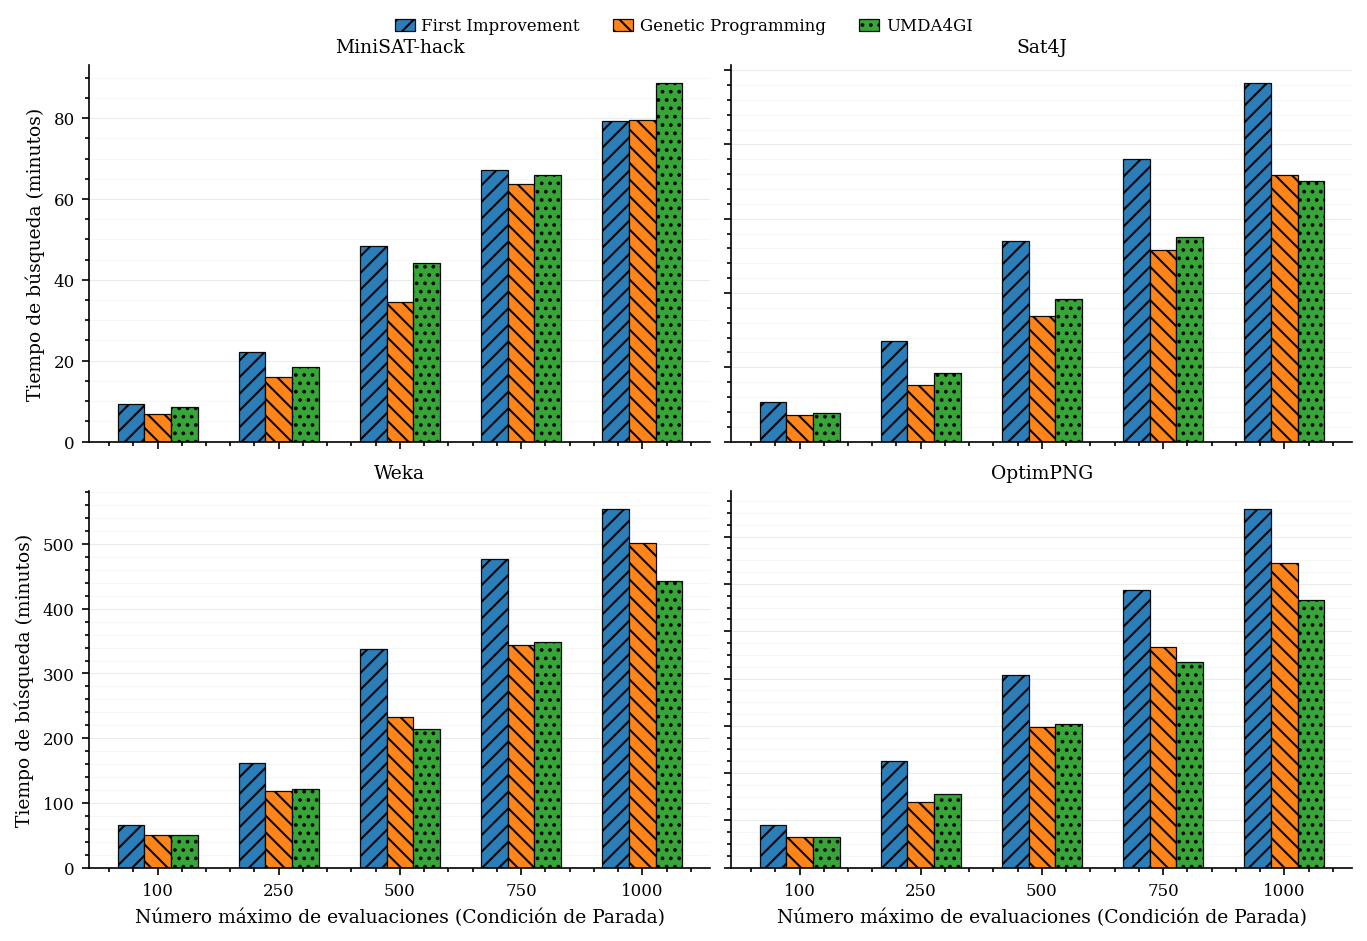

In [14]:

# For each software plot the graph of search_time_minutes vs max_evals for each algorithm.
# figura 2x2 con los 4 softwares;

import os
import matplotlib.pyplot as plt
os.makedirs("plots", exist_ok=True)

legend_name_map = {
    'FirstImprovement': 'First Improvement',
    'GeneticProgrammingUniformConcat': 'Genetic Programming',
    'UMDAAlgorithm': 'UMDA4GI'
}

software_display_map = {
    "minisat_hack": "MiniSAT-hack",
    "sat4j": "Sat4J",
    "weka": "Weka",
    "pngOptim": "OptimPNG",
}
desired_software_order = ["minisat_hack", "sat4j", "weka", "pngOptim"]

# Estilo "publicación" (compacto para 2x2)
plt.rcParams.update({
    "font.family": "serif",
    "font.size": 9,
    "axes.labelsize": 9,
    "axes.titlesize": 9,
    "axes.linewidth": 0.8,
    "xtick.labelsize": 8,
    "ytick.labelsize": 8,
    "legend.fontsize": 8,
    "legend.frameon": False,
    "figure.dpi": 150,
    "savefig.dpi": 300,
    "savefig.transparent": True,
    "svg.fonttype": "none",
})

palette = list(plt.cm.tab10.colors)
hatch_patterns = ['///', '\\\\\\', '...', 'xx', '++', 'oo', '--', '||', '**', '..']

softwares_list = [sw for sw in desired_software_order if sw in list(softwares)]
n = len(softwares_list)
ncols = 2
nrows = (n + ncols - 1) // ncols

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(9.0, 6.0), constrained_layout=True)
axes = axes.ravel() if hasattr(axes, "ravel") else [axes]

handles, labels = None, None

for idx, software in enumerate(softwares_list):
    ax = axes[idx]
    software_data = averaged_results[averaged_results['software'] == software].copy()
    algorithms = list(software_data['algorithm'].unique())

    x = sorted(software_data['max_evals'].unique())
    bar_width = 0.22
    positions = range(len(x))

    for i, algorithm in enumerate(algorithms):
        algorithm_data = (
            software_data[software_data['algorithm'] == algorithm]
            .sort_values('max_evals')
        )

        ax.bar(
            [pos + (i * bar_width) for pos in positions],
            algorithm_data['search_time_minutes'],
            width=bar_width,
            label=legend_name_map.get(algorithm, algorithm),
            color=palette[i % len(palette)],
            edgecolor="black",
            linewidth=0.6,
            hatch=hatch_patterns[i % len(hatch_patterns)],
            alpha=0.95
        )

    ax.set_title(software_display_map.get(software, software))

    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.tick_params(axis='both', which='both', direction='out', width=0.8)

    ax.set_xticks([pos + bar_width for pos in positions], x)

    ax.set_axisbelow(True)
    ax.grid(axis='y', linestyle='-', linewidth=0.5, alpha=0.25)
    ax.minorticks_on()
    ax.grid(axis='y', which='minor', linestyle='-', linewidth=0.35, alpha=0.15)

    if handles is None:
        handles, labels = ax.get_legend_handles_labels()

    row = idx // ncols
    col = idx % ncols

    if row != nrows - 1:
        ax.set_xlabel('')
        ax.tick_params(axis='x', labelbottom=False)
    else:
        ax.set_xlabel('Número máximo de evaluaciones (Condición de Parada)')

    if col != 0:
        ax.set_ylabel('')
        ax.tick_params(axis='y', labelleft=False)
    else:
        ax.set_ylabel('Tiempo de búsqueda (minutos)')

for j in range(n, len(axes)):
    axes[j].set_visible(False)

fig.legend(
    handles,
    labels,
    loc='upper center',
    bbox_to_anchor=(0.5, 1.02),
    ncol=3,
    borderaxespad=0.0,
    handlelength=1.2,
    handletextpad=0.4,
    labelspacing=0.3,
    borderpad=0.2,
)

plt.savefig("plots/tiempo_2x2.pdf", format="pdf", bbox_inches="tight")
plt.show()




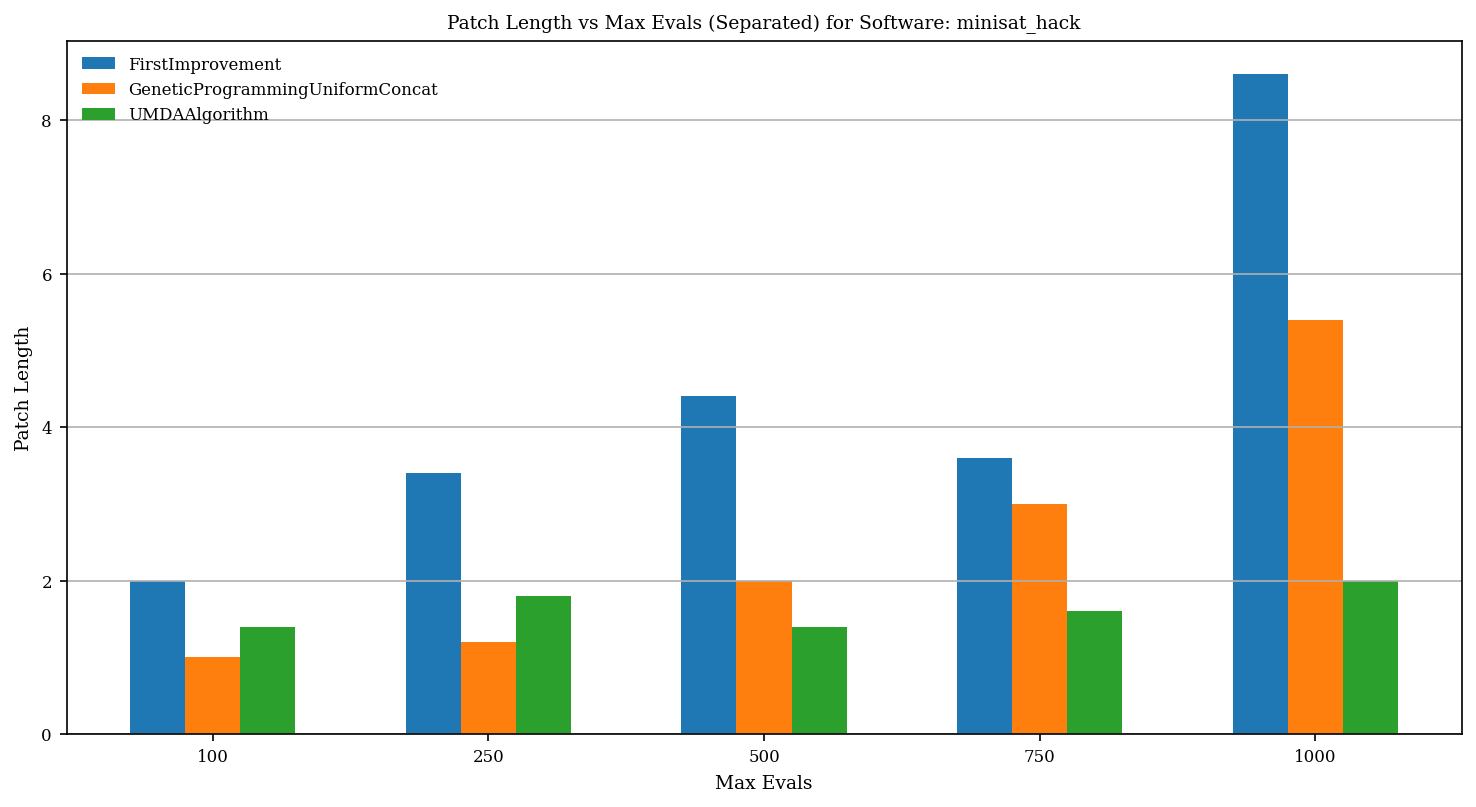

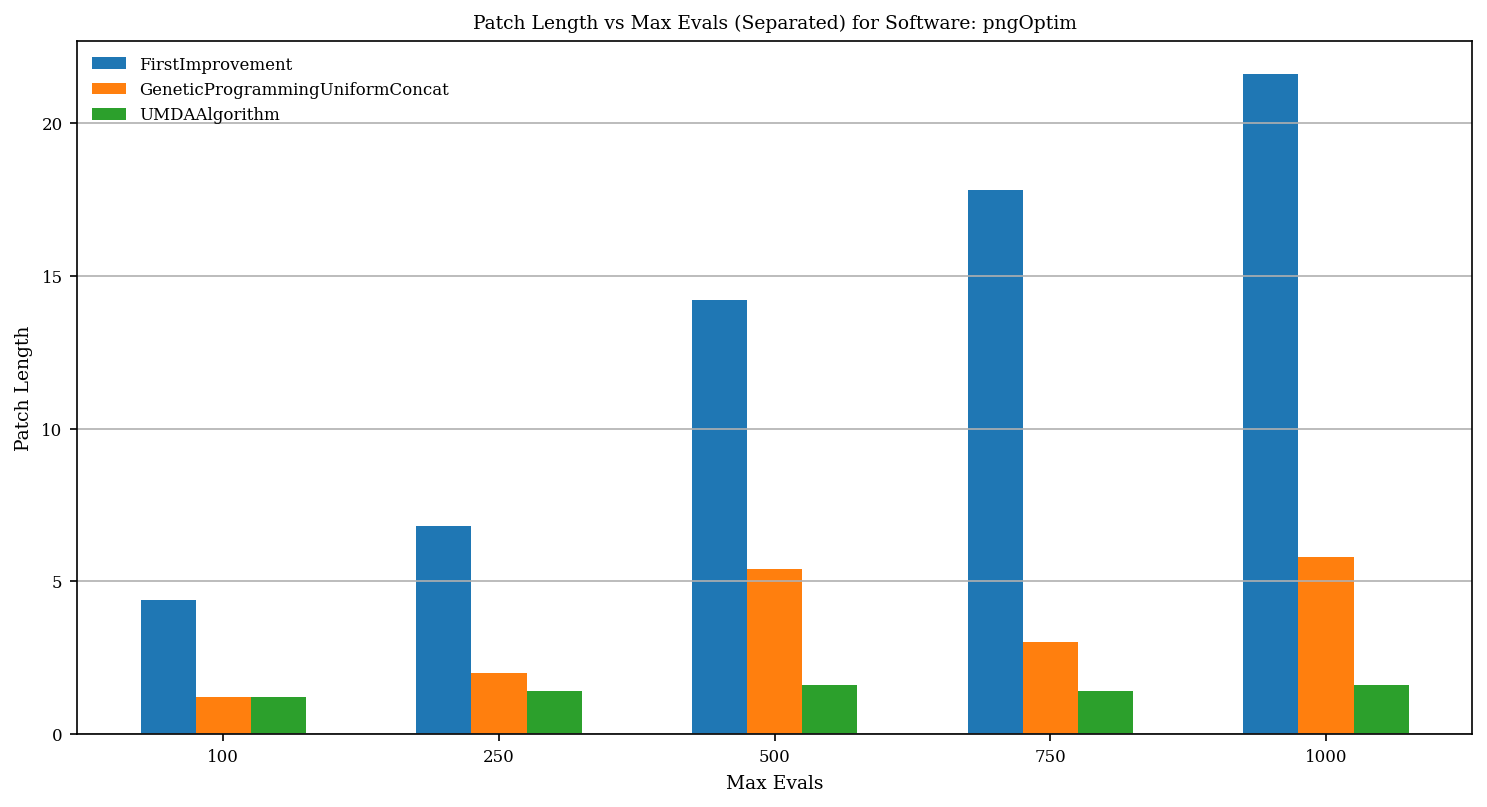

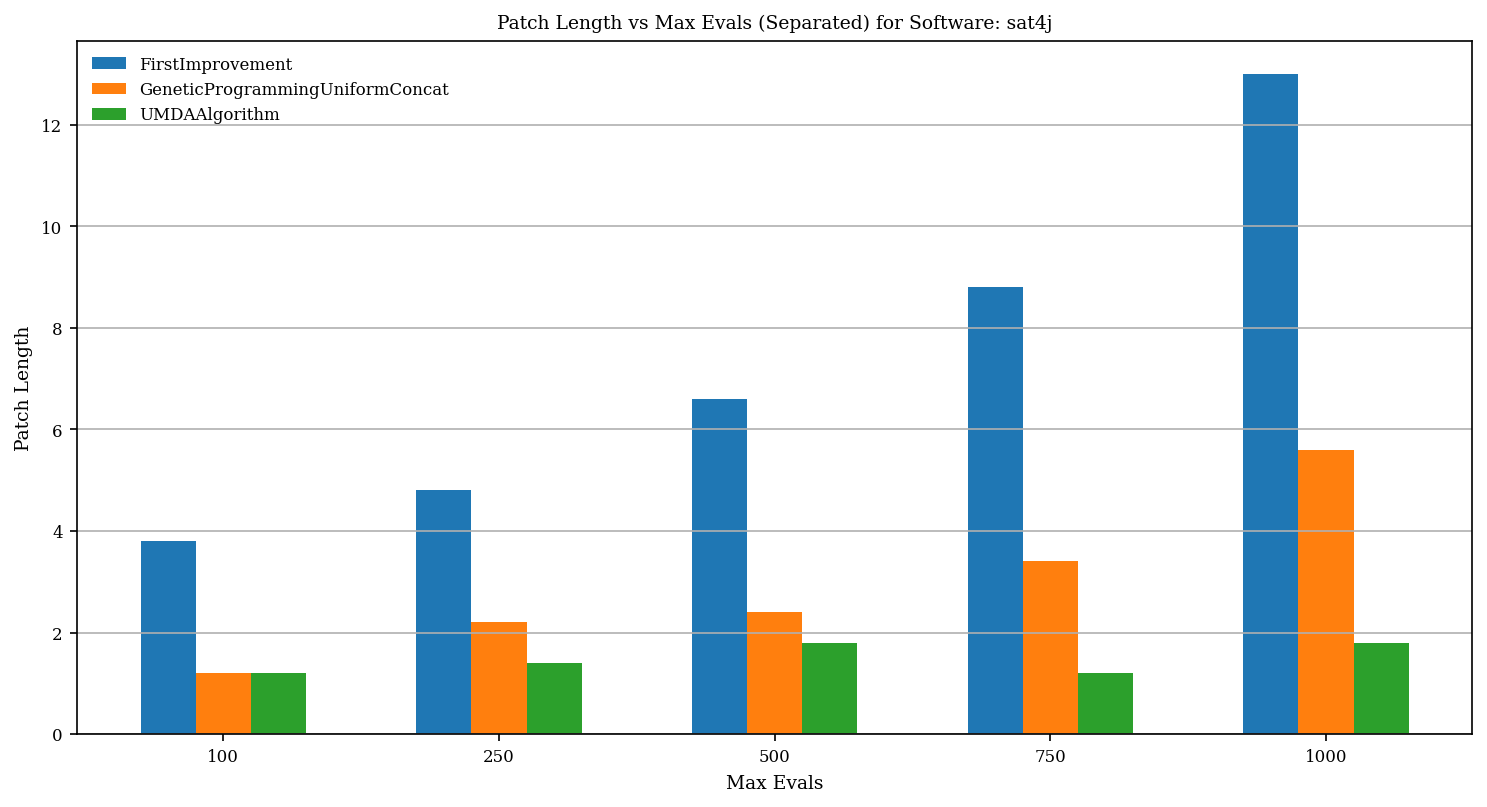

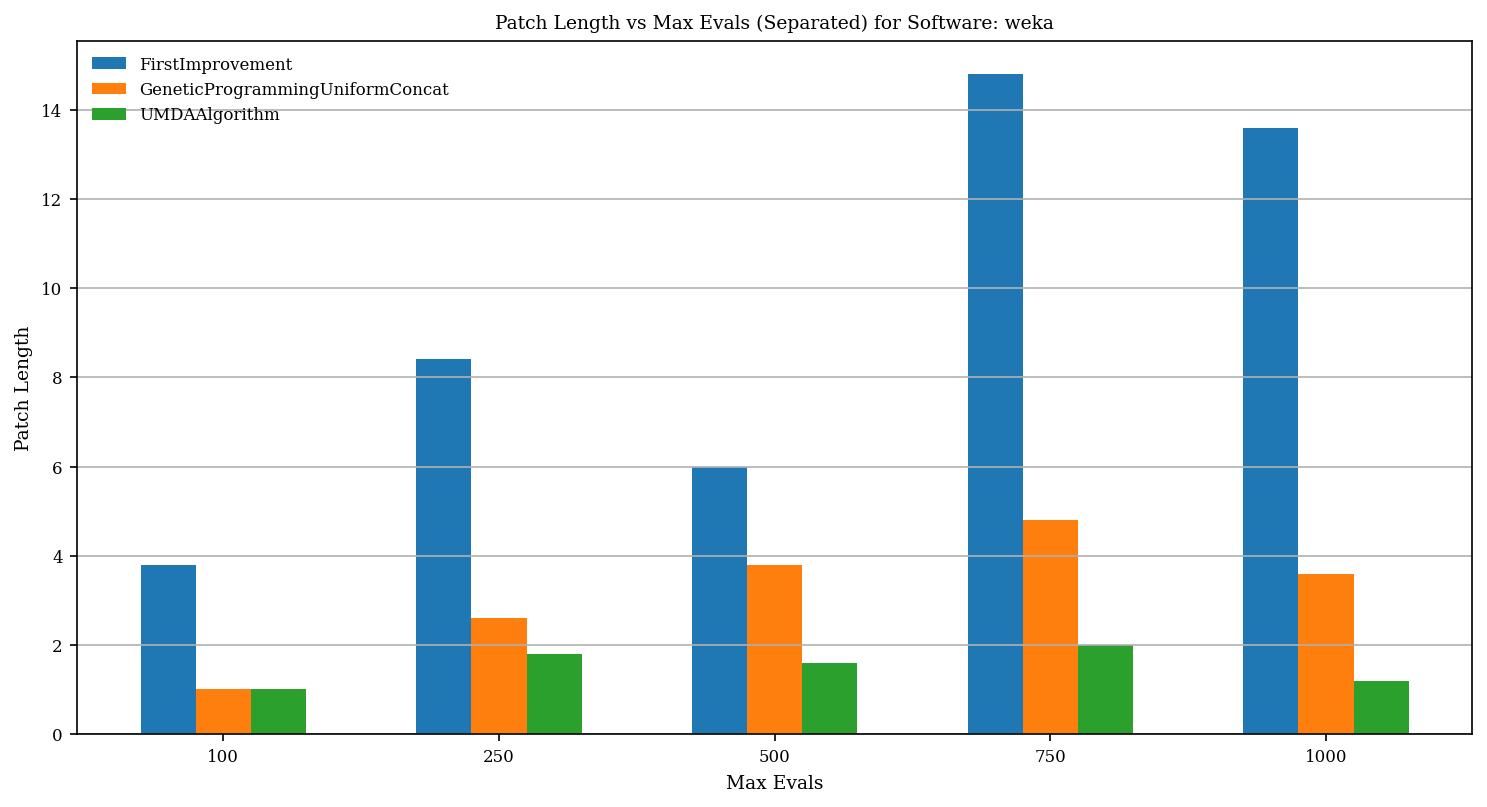

'Promedio de patch_length por software, algoritmo y max_evals (incluyendo media de fila):'

max_evals                                     100  250   500   750  1000  \
software     algorithm                                                     
minisat_hack FirstImprovement                 2.0  3.4   4.4   3.6   8.6   
             GeneticProgrammingUniformConcat  1.0  1.2   2.0   3.0   5.4   
             UMDAAlgorithm                    1.4  1.8   1.4   1.6   2.0   
pngOptim     FirstImprovement                 4.4  6.8  14.2  17.8  21.6   
             GeneticProgrammingUniformConcat  1.2  2.0   5.4   3.0   5.8   
             UMDAAlgorithm                    1.2  1.4   1.6   1.4   1.6   
sat4j        FirstImprovement                 3.8  4.8   6.6   8.8  13.0   
             GeneticProgrammingUniformConcat  1.2  2.2   2.4   3.4   5.6   
             UMDAAlgorithm                    1.2  1.4   1.8   1.2   1.8   
weka         FirstImprovement                 3.8  8.4   6.0  14.8  13.6   
             GeneticProgrammingUniformConcat  1.0  2.6   3.8   4.8   3.6   
             UMDAAlgorithm                    1.0  1.8   1.6   2.0   1.2   

max_evals                                     Row_Mean  
software     algorithm                                  
minisat_hack FirstImprovement                     4.40  
             GeneticProgrammingUniformConcat      2.52  
             UMDAAlgorithm                        1.64  
pngOptim     FirstImprovement                    12.96  
             GeneticProgrammingUniformConcat      3.48  
             UMDAAlgorithm                        1.44  
sat4j        FirstImprovement                     7.40  
             GeneticProgrammingUniformConcat      2.96  
             UMDAAlgorithm                        1.48  
weka         FirstImprovement                     9.32  
             GeneticProgrammingUniformConcat      3.16  
             UMDAAlgorithm                        1.52

Tabla copiada al portapapeles.


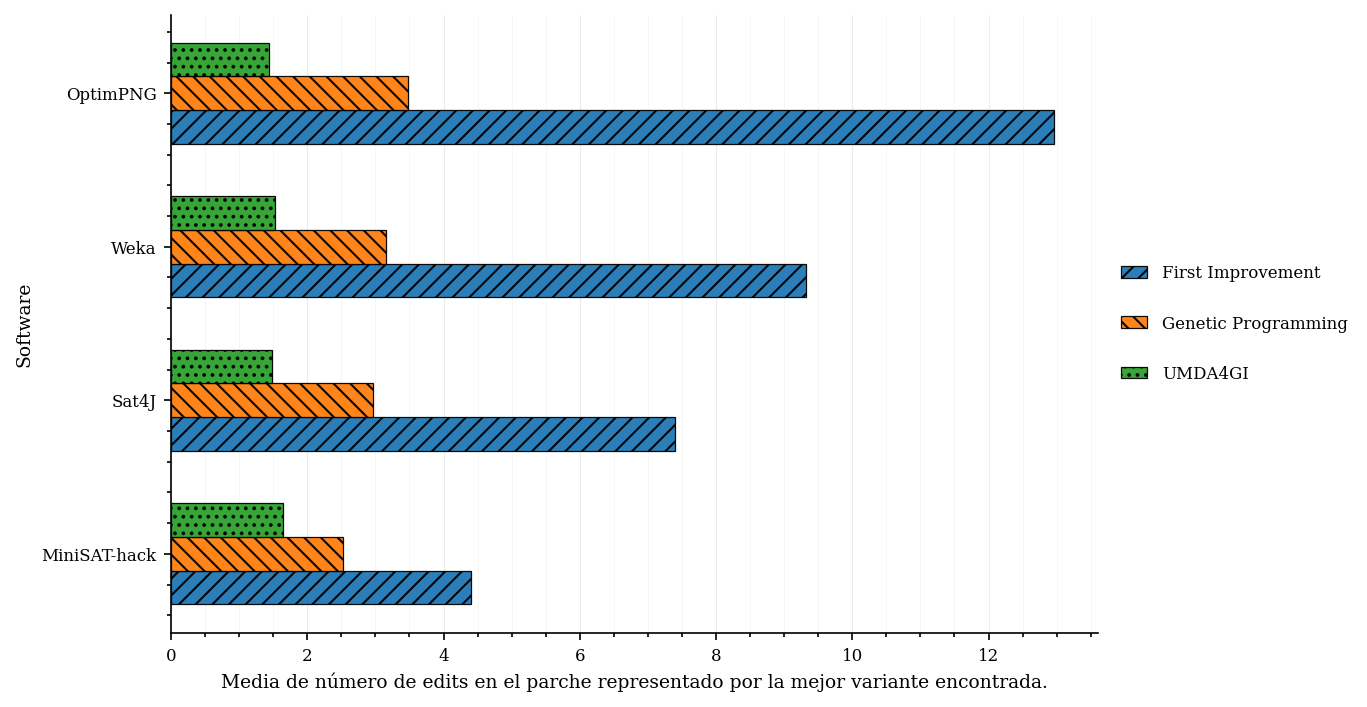

In [15]:
### 5. Análisis de longitud de los Patches
# For each software plot the graph of patch_length vs max_evals for each algorithm.

for software in softwares:
    software_data = averaged_results[averaged_results['software'] == software]
    algorithms = software_data['algorithm'].unique()

    plt.figure(figsize=(12, 6))

    # Prepare data for separate bar plots with custom width
    x = software_data['max_evals'].unique()
    bar_width = 0.2
    positions = range(len(x))

    for i, algorithm in enumerate(algorithms):
        algorithm_data = software_data[software_data['algorithm'] == algorithm]
        # Bar positions are offset by algorithm index
        plt.bar(
            [pos + (i * bar_width) for pos in positions],  # Shift bars for each algorithm
            algorithm_data['patch_length'],
            width=bar_width,
            label=algorithm
        )

    plt.title(f'Patch Length vs Max Evals (Separated) for Software: {software}')
    plt.xlabel('Max Evals')
    plt.ylabel('Patch Length')
    plt.xticks([pos + bar_width for pos in positions], x)  # Set x-axis ticks
    plt.legend()
    plt.grid(axis='y')
    plt.show()

# Tabla de tamaño de parches (patch_length) promedio para cada algoritmo y software, para todos los max_evals
# Añadir columna con la media de la fila

# Filtrar las columnas necesarias
patch_size_avg = averaged_results.groupby(['software', 'algorithm', 'max_evals'], as_index=False)['patch_length'].mean()

# Pivotar la tabla para que los max_evals sean columnas
patch_size_table = patch_size_avg.pivot(index=['software', 'algorithm'], columns='max_evals', values='patch_length')

# Añadir columna con la media de cada fila
patch_size_table['Row_Mean'] = patch_size_table.mean(axis=1)

# Mostrar la tabla
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
display("Promedio de patch_length por software, algoritmo y max_evals (incluyendo media de fila):")
display(patch_size_table)

# Opción: copiar la tabla al portapapeles
patch_size_table.to_clipboard(index=True)
print("Tabla copiada al portapapeles.")

import os
import numpy as np
import matplotlib.pyplot as plt

os.makedirs("plots", exist_ok=True)

# Estilo "publicación" (consistente con el resto del notebook)
plt.rcParams.update({
    "font.family": "serif",
    "font.size": 9,
    "axes.labelsize": 9,
    "axes.titlesize": 9,
    "axes.linewidth": 0.8,
    "xtick.labelsize": 8,
    "ytick.labelsize": 8,
    "legend.fontsize": 8,
    "legend.frameon": False,
    "figure.dpi": 150,
    "savefig.dpi": 300,
    "savefig.transparent": True,
    "svg.fonttype": "none",
})

# Media de patch_length en los 5 valores de max_evals (100, 250, 500, 750, 1000)
mean_col = 'Row_Mean'
if mean_col not in patch_size_table.columns:
    max_cols = [c for c in patch_size_table.columns if isinstance(c, (int, np.integer))]
    patch_size_table[mean_col] = patch_size_table[max_cols].mean(axis=1)

row_mean_df = patch_size_table[[mean_col]].reset_index()
row_mean_df = row_mean_df.rename(columns={mean_col: 'mean_patch_length'})

# Orden y nombres solicitados (orden de aparición: MiniSAT-hack, Sat4J, Weka, OptimPNG)
software_display_map = {
    "minisat_hack": "MiniSAT-hack",
    "sat4j": "Sat4J",
    "weka": "Weka",
    "pngOptim": "OptimPNG",
}
desired_software_order = ["minisat_hack", "sat4j", "weka", "pngOptim"]
row_mean_df['software'] = pd.Categorical(row_mean_df['software'], categories=desired_software_order, ordered=True)

# Orden consistente para algoritmos (si existen)
if 'algorithms' in globals():
    alg_order = list(algorithms)
else:
    alg_order = sorted(row_mean_df['algorithm'].unique())
row_mean_df['algorithm'] = pd.Categorical(row_mean_df['algorithm'], categories=alg_order, ordered=True)

row_mean_df = row_mean_df.sort_values(['software', 'algorithm'])

legend_name_map = globals().get('legend_name_map', {})

soft_list = list(row_mean_df['software'].cat.categories) if hasattr(row_mean_df['software'], "cat") else sorted(
    row_mean_df['software'].unique())
alg_list = list(row_mean_df['algorithm'].cat.categories) if hasattr(row_mean_df['algorithm'], "cat") else sorted(
    row_mean_df['algorithm'].unique())

n_soft = len(soft_list)
n_alg = len(alg_list)

y = np.arange(n_soft)
bar_h = 0.22 if n_alg <= 3 else 0.18
offsets = (np.arange(n_alg) - (n_alg - 1) / 2.0) * bar_h

palette = globals().get('palette', list(plt.cm.tab10.colors))
hatch_patterns = globals().get('hatch_patterns', ['///', '\\\\\\', '...', 'xx', '++', 'oo', '--', '||', '**', '..'])

fig, ax = plt.subplots(figsize=(9.0, 2.8 + 0.45 * n_soft), constrained_layout=True)

for i, alg in enumerate(alg_list):
    vals = []
    for sw in soft_list:
        v = row_mean_df.loc[(row_mean_df['software'] == sw) & (row_mean_df['algorithm'] == alg), 'mean_patch_length']
        vals.append(float(v.iloc[0]) if len(v) else np.nan)

    ax.barh(
        y + offsets[i],
        vals,
        height=bar_h,
        label=legend_name_map.get(str(alg), str(alg)),
        color=palette[i % len(palette)],
        edgecolor="black",
        linewidth=0.6,
        hatch=hatch_patterns[i % len(hatch_patterns)],
        alpha=0.95
    )

ax.set_yticks(y, [software_display_map.get(sw, sw) for sw in soft_list])
ax.set_xlabel('Media de número de edits en el parche representado por la mejor variante encontrada.')
ax.set_ylabel('Software')

ax.set_axisbelow(True)
ax.grid(axis='x', linestyle='-', linewidth=0.5, alpha=0.25)
ax.minorticks_on()
ax.grid(axis='x', which='minor', linestyle='-', linewidth=0.35, alpha=0.15)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.tick_params(axis='both', which='both', direction='out', width=0.8)

ax.legend(
    loc='center left',
    bbox_to_anchor=(1.02, 0.5),
    ncol=1,
    borderaxespad=0.0,
    handlelength=1.6,
    handletextpad=0.9,
    labelspacing=2.0,
    borderpad=0.25
)

plt.savefig("plots/patch_length_mean_barh.pdf", format="pdf", bbox_inches="tight", pad_inches=0.25)
plt.savefig("plots/patch_length_mean_barh.svg", format="svg", bbox_inches="tight", pad_inches=0.25)
plt.show()